In [9]:
import pandas as pd
import requests
from datetime import datetime, timedelta
from newsapi import NewsApiClient
from transformers import pipeline
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# API keys
newsapi = NewsApiClient(api_key='34c8448d8cbf4e5f9f81c8f06c3ecd58')

# API input parameters
search_keywords = 'Tesla'

# days = ['15', '16', '17', '18', '19', '20', '21', 
#         '22', '23', '24', '25', '26', '27', '28', 
#         '29', '30', '31']

days = ['07', '08', '09', '10', '11', '12', '13', '14']


# months = ['01','02','03','04','05','06','07','08','09','10','11','12']
months = ['02']

# dates
# start_date = '2023-02-01'
# end_date = '2023-02-01'
# start_date = (datetime.now() - timedelta(days=10)).strftime('%Y-%m-%d')
# end_date = datetime.now().strftime('%Y-%m-%d')

# Sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


# News API

In [ ]:
df_news = pd.read_csv('df_news.csv')

In [ ]:
df_news

In [10]:
dict_news = {'date':[], 'title':[], 'sentiment':[], 'sentiment_score':[]}

In [11]:
def addFetchedDataToDictionary(fetched_data):
    for article in fetched_data['articles']:

        dict_news['date'].append((article['publishedAt'][:10]))
        dict_news['title'].append((article['title']))
        dict_news['sentiment'].append(classifier(article['title'])[0]['label'])
        dict_news['sentiment_score'].append(classifier(article['title'])[0]['score'])

In [12]:
for month in months:

    for day in days:

        selected_date = '2023-' + month + '-' + day

        print(selected_date)

        try:
            articles_news_api = newsapi.get_everything(q=search_keywords,
                                                       from_param=selected_date, 
                                                       to=selected_date, 
                                                       language='en', 
                                                       sort_by='publishedAt'
                                                       )
            
        except:
            print(articles_news_api)
            continue

        addFetchedDataToDictionary(articles_news_api)

        print(articles_news_api)


2023-02-07
{'status': 'ok', 'totalResults': 216, 'articles': [{'source': {'id': None, 'name': 'Seeking Alpha'}, 'author': 'LD Investments', 'title': "BYD: World's Biggest EV Maker Has A Long Road Of Growth", 'description': "BYD recently overtook Tesla as the world's top EV maker (including PHEV) and may overtake Tesla in terms of BEVs. Click here to read my analysis of BYD.", 'url': 'https://seekingalpha.com/article/4576117-byd-worlds-biggest-ev-maker-has-long-road-of-growth', 'urlToImage': 'https://static.seekingalpha.com/cdn/s3/uploads/getty_images/1408649945/image_1408649945.jpg?io=getty-c-w1536', 'publishedAt': '2023-02-07T23:59:05Z', 'content': 'Getty Images\r\nTesla chief Elon Musk commented that Tesla’s (TSLA) nearest rival is likely to be a Chinese EV company. Warren Buffett-backed BYD (OTCPK:BYDDF) (OTCPK:BYDDY) could be the one to watch.\r… [+9839 chars]'}, {'source': {'id': 'associated-press', 'name': 'Associated Press'}, 'author': 'Michelle Chapman', 'title': 'Big tech job 

In [ ]:
selected_date = '2023-02-15'

articles_news_api = newsapi.get_everything(q=search_keywords,
                                                       from_param=selected_date, 
                                                       to=selected_date, 
                                                       language='en', 
                                                       sort_by='publishedAt'
                                                       )

In [13]:
df_news = pd.DataFrame(dict_news)

In [14]:
df_news.to_csv('df_news7-14.csv')

In [27]:
df_news.shape

(788, 4)

In [23]:
df_newsb = pd.read_csv('df_news.csv')
df_newsb.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
df_newsb.shape

(1700, 4)

In [25]:
df_combined = pd.concat([df_news, df_newsb], ignore_index=True)

In [28]:
df_news = df_combined

In [29]:
df_news.shape

(2488, 4)

# Calculate weighted score

In [30]:
df_news['weighted_score'] = df_news['sentiment_score'] * df_news['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': -1})

In [31]:
df_news

,date,title,sentiment,sentiment_score,weighted_score
0,2023-02-07,BYD: World's Biggest EV Maker Has A Long Road ...,POSITIVE,0.999553,0.999553
1,2023-02-07,Big tech job cuts keep coming; Zoom latest to ...,NEGATIVE,0.959800,-0.959800
2,2023-02-07,For Recent Tesla buyers in California CVPR reb...,NEGATIVE,0.951487,-0.951487
3,2023-02-07,An Ohio company just landed the largest state ...,POSITIVE,0.901409,0.901409
4,2023-02-07,Here are the latest tech layoffs as the indust...,NEGATIVE,0.998355,-0.998355
...,...,...,...,...,...
2483,2023-03-04,Mercedes Benz MB.OS: New Infotainment Features...,POSITIVE,0.993752,0.993752
2484,2023-03-04,This Week’s Awesome Tech Stories From Around t...,POSITIVE,0.999801,0.999801
2485,2023-03-04,The 1990s MTV Cartoon With a Surprisingly Mode...,POSITIVE,0.976444,0.976444
2486,2023-03-04,Construction begins on Nevada lithium mine des...,NEGATIVE,0.889175,-0.889175


In [ ]:
grouped_df = df_news.groupby('date')['weighted_score'].mean()

In [32]:
grouped_df = df_news.groupby('date')['weighted_score'].mean()
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['date', 'average_sentiment']
grouped_df

,date,average_sentiment
0,2023-02-07,-0.499413
1,2023-02-08,-0.210089
2,2023-02-09,-0.574404
3,2023-02-10,-0.476709
4,2023-02-11,-0.347066
5,2023-02-12,-0.371067
6,2023-02-13,-0.257448
7,2023-02-14,-0.421579
8,2023-02-15,-0.233861
9,2023-02-16,-0.728042


In [ ]:
plt.plot(grouped_df['date'], grouped_df['average_sentiment'])

# Add title and axis labels
# plt.title('TSLA Close Values for the Last 7 Days')
# plt.xlabel('Date')
# plt.ylabel('Close Value')
plt.xticks(grouped_df['date'], rotation=90)

# Display the chart
plt.show()


In [ ]:
addFetchedDataToDictionary(articles_news_api)

In [ ]:
(articles_news_api['articles'])

# GNews API

In [33]:
url = 'https://gnews.io/api/v4/search'
query_params = {
    'q': 'Tesla',
    'token': '9c91bc6d7cca946fffc04ee94bc2e24c',
    'lang': 'en',
    'from':'2023-02-07',
    'to': '2023-03-05'
}

# make the request
response_gnews = requests.get(url, params=query_params)

# parse the response
data_gnews = response_gnews.json()

In [ ]:
import requests

# set API token and search parameters
api_token = '9c91bc6d7cca946fffc04ee94bc2e24c'
keyword = 'Tesla'
date = '2023-02-15'

# create the API request URL
url = f'https://gnews.io/api/v4/search?q={keyword}&mindate={date}&maxdate={date}&token={api_token}&from={date}&to={date}'

# make the API request
response = requests.get(url)

# parse the JSON data and filter by publication date
data_gnews = response.json()

In [ ]:
for article in data_gnews['articles']:

    print(article['publishedAt'])

In [ ]:
data_gnews

In [ ]:
addFetchedDataToDictionary(data_gnews)

In [ ]:
len(dict_news['date'])

# Finance market data

In [34]:
# Define the ticker symbol
tickerSymbol = 'TSLA'

# Get the data for the last 7 days
# start_date = (datetime.datetime.now() - datetime.timedelta(days=15)).strftime('%Y-%m-%d')
# end_date = datetime.datetime.now().strftime('%Y-%m-%d')

start_date = '2023-02-07'
end_date = '2023-03-05'

# Get the data from Yahoo Finance
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(start=start_date, end=end_date)




In [35]:
tickerDf['price_movement']=((tickerDf['Close']-tickerDf['Open'])/tickerDf['Open'])*10 

In [36]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,price_movement
Date,,,,,,,,
2023-02-07 00:00:00-05:00,196.429993,197.500000,189.550003,196.809998,186010300,0.0,0.0,0.019346
2023-02-08 00:00:00-05:00,196.100006,203.000000,194.309998,201.289993,180673600,0.0,0.0,0.264660
2023-02-09 00:00:00-05:00,207.779999,214.000000,204.770004,207.320007,215431400,0.0,0.0,-0.022138
2023-02-10 00:00:00-05:00,202.229996,206.199997,192.889999,196.889999,204193800,0.0,0.0,-0.264056
2023-02-13 00:00:00-05:00,194.419998,196.300003,187.610001,194.639999,172475500,0.0,0.0,0.011316
2023-02-14 00:00:00-05:00,191.940002,209.820007,189.440002,209.250000,216455700,0.0,0.0,0.901844
2023-02-15 00:00:00-05:00,211.759995,214.660004,206.110001,214.240005,182108600,0.0,0.0,0.117114
2023-02-16 00:00:00-05:00,210.779999,217.649994,201.839996,202.039993,229586500,0.0,0.0,-0.414651
2023-02-17 00:00:00-05:00,199.990005,208.440002,197.500000,208.309998,213080200,0.0,0.0,0.416020


In [37]:
tickerDf = tickerDf.reset_index()

In [38]:
# tickerDf['date'] = str(tickerDf['Date'].dt.date)

tickerDf['date'] = tickerDf['Date'].dt.strftime('%Y-%m-%d')

In [39]:
tickerDf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,price_movement,date
0,2023-02-07 00:00:00-05:00,196.429993,197.500000,189.550003,196.809998,186010300,0.0,0.0,0.019346,2023-02-07
1,2023-02-08 00:00:00-05:00,196.100006,203.000000,194.309998,201.289993,180673600,0.0,0.0,0.264660,2023-02-08
2,2023-02-09 00:00:00-05:00,207.779999,214.000000,204.770004,207.320007,215431400,0.0,0.0,-0.022138,2023-02-09
3,2023-02-10 00:00:00-05:00,202.229996,206.199997,192.889999,196.889999,204193800,0.0,0.0,-0.264056,2023-02-10
4,2023-02-13 00:00:00-05:00,194.419998,196.300003,187.610001,194.639999,172475500,0.0,0.0,0.011316,2023-02-13
5,2023-02-14 00:00:00-05:00,191.940002,209.820007,189.440002,209.250000,216455700,0.0,0.0,0.901844,2023-02-14
6,2023-02-15 00:00:00-05:00,211.759995,214.660004,206.110001,214.240005,182108600,0.0,0.0,0.117114,2023-02-15
7,2023-02-16 00:00:00-05:00,210.779999,217.649994,201.839996,202.039993,229586500,0.0,0.0,-0.414651,2023-02-16
8,2023-02-17 00:00:00-05:00,199.990005,208.440002,197.500000,208.309998,213080200,0.0,0.0,0.416020,2023-02-17
9,2023-02-21 00:00:00-05:00,204.990005,209.710007,197.220001,197.369995,180018600,0.0,0.0,-0.371726,2023-02-21


In [40]:
merged_df = pd.merge(tickerDf, grouped_df, on='date', how='outer')

In [41]:
merged_df['Date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')

In [42]:
merged_df = merged_df.dropna(how='any')

In [43]:
merged_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,price_movement,date,average_sentiment
0,2023-02-07,196.429993,197.500000,189.550003,196.809998,186010300.0,0.0,0.0,0.019346,2023-02-07,-0.499413
1,2023-02-08,196.100006,203.000000,194.309998,201.289993,180673600.0,0.0,0.0,0.264660,2023-02-08,-0.210089
2,2023-02-09,207.779999,214.000000,204.770004,207.320007,215431400.0,0.0,0.0,-0.022138,2023-02-09,-0.574404
3,2023-02-10,202.229996,206.199997,192.889999,196.889999,204193800.0,0.0,0.0,-0.264056,2023-02-10,-0.476709
4,2023-02-13,194.419998,196.300003,187.610001,194.639999,172475500.0,0.0,0.0,0.011316,2023-02-13,-0.257448
5,2023-02-14,191.940002,209.820007,189.440002,209.250000,216455700.0,0.0,0.0,0.901844,2023-02-14,-0.421579
6,2023-02-15,211.759995,214.660004,206.110001,214.240005,182108600.0,0.0,0.0,0.117114,2023-02-15,-0.233861
7,2023-02-16,210.779999,217.649994,201.839996,202.039993,229586500.0,0.0,0.0,-0.414651,2023-02-16,-0.728042
8,2023-02-17,199.990005,208.440002,197.500000,208.309998,213080200.0,0.0,0.0,0.416020,2023-02-17,-0.396021
9,2023-02-21,204.990005,209.710007,197.220001,197.369995,180018600.0,0.0,0.0,-0.371726,2023-02-21,-0.466300


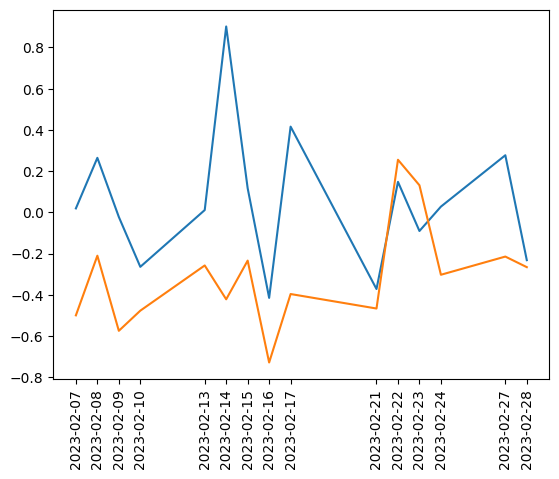

In [44]:
# Create a line chart
plt.plot(merged_df['Date'], merged_df['price_movement'])
plt.plot(merged_df['Date'], merged_df['average_sentiment'])


# Add title and axis labels
# plt.title('TSLA Close Values')
# plt.xlabel('Date')
# plt.ylabel('Close Value')
plt.xticks(merged_df['Date'], rotation=90)

# Display the chart
plt.show()

In [ ]:
merged_df.to_csv('merged_df1.csv')

In [ ]:
plt.plot(grouped_df['date'], grouped_df['average_sentiment'])
plt.xticks(grouped_df['date'], rotation=90)

# Display the chart
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots()

# Create a line chart for sentiment
ax.plot(df_news_results['date'], df_news_results['sentiment'], color='green')

# Set the x-axis label, rotate the tick labels, and add a title
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
ax.set_title('News Sentiment')

plt.xticks(rotation=90)

# Display the chart
plt.show()


In [ ]:
classifier = pipeline("sentiment-analysis")
#  classifier("I've been waiting for a HuggingFace course my whole life.")

In [ ]:
df_results = pd.DataFrame(results_dict)

In [ ]:
df_results

In [ ]:
articles['articles'][0]

In [ ]:
print(articles['articles'][0]['publishedAt'])

In [ ]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'TSLA'

# Get the data for the last 7 days
start_date = (datetime.datetime.now() - datetime.timedelta(days=7)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Get the data from Yahoo Finance
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(start=start_date, end=end_date)

# Print the data
print(tickerDf)

In [ ]:
tickerDf

In [ ]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = 'TSLA'

# Get the data for the last 7 days
start_date = (datetime.datetime.now() - datetime.timedelta(days=7)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Get the data from Yahoo Finance
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(start=start_date, end=end_date)


# Create a line chart
plt.plot(tickerDf.index, tickerDf['Close'])

# Add title and axis labels
plt.title('TSLA Close Values for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.xticks(rotation=25)

# Display the chart
plt.show()


# Alpha Vantage

In [ ]:
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY_ADJUSTED',
    'symbol': 'TSLA',
    'outputsize': 'compact',
    'apikey': 'IUP8ECIFSABF0MWV',
    'start_date': '2022-02-25',
    'end_date': '2022-03-04'
}

response = requests.get(url, params=params)
data = response.json()

In [ ]:
# Extract the closing prices from the response
closing_prices = {'date':[], 'closing_price':[]}

for date, values in data['Time Series (Daily)'].items():

    closing_prices['date'].append(date)
    closing_prices['closing_price'].append(float(values['4. close']))

# Print the closing prices
df_closing_prices = pd.DataFrame(closing_prices)

In [ ]:
df_closing_prices

In [ ]:
# Make the API request and parse the JSON response
response = requests.get(url, params=params)
data = response.json()

# Extract the relevant data from the response
symbol = data['Global Quote']['01. symbol']
price = float(data['Global Quote']['05. price'])
volume = int(data['Global Quote']['06. volume'])

# Print the data
print(f'Symbol: {symbol}')
print(f'Price: {price:.2f}')
print(f'Volume: {volume:,}')

In [ ]:
import json

print(json.dumps(data, indent=4))